In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('/content/Applicant-details.csv')

df.head()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,75722,9657655,76,0,single,rented,no,Psychologist,Jalandhar,Punjab,0,12,0
1,80185,9259353,37,18,single,rented,no,Petroleum_Engineer,Bally,West_Bengal,12,11,0
2,19865,1509721,66,8,single,rented,no,Drafter,Indore,Madhya_Pradesh,4,12,0
3,76700,5867312,43,1,single,owned,no,Chartered_Accountant,Kurnool[18],Andhra_Pradesh,1,13,1
4,92992,7223191,44,9,single,rented,no,Air_traffic_controller,Asansol,West_Bengal,9,13,0


In [23]:
df.isnull().sum()

,0
Applicant_ID,0
Annual_Income,0
Applicant_Age,0
Work_Experience,0
Marital_Status,0
House_Ownership,0
Vehicle_Ownership(car),0
Occupation,0
Residence_City,0
Residence_State,0


In [24]:
df.dtypes

,0
Applicant_ID,int64
Annual_Income,int64
Applicant_Age,int64
Work_Experience,int64
Marital_Status,object
House_Ownership,object
Vehicle_Ownership(car),object
Occupation,object
Residence_City,object
Residence_State,object


In [25]:
df.describe()

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,50000.500,5001617.026,49.995,10.111,6.343,11.996,0.130
std,28867.658,2876393.521,17.056,5.996,3.645,1.397,0.336
min,1.000,10310.000,21.000,0.000,0.000,10.000,0.000
25%,25000.750,2507092.000,35.000,5.000,4.000,11.000,0.000
50%,50000.500,5004938.000,50.000,10.000,6.000,12.000,0.000
75%,75000.250,7477502.000,65.000,15.000,9.000,13.000,0.000
max,100000.000,9999180.000,79.000,20.000,14.000,14.000,1.000


In [26]:
df['Loan_Default_Risk'].value_counts()

,count
Loan_Default_Risk,
0,87003
1,12997


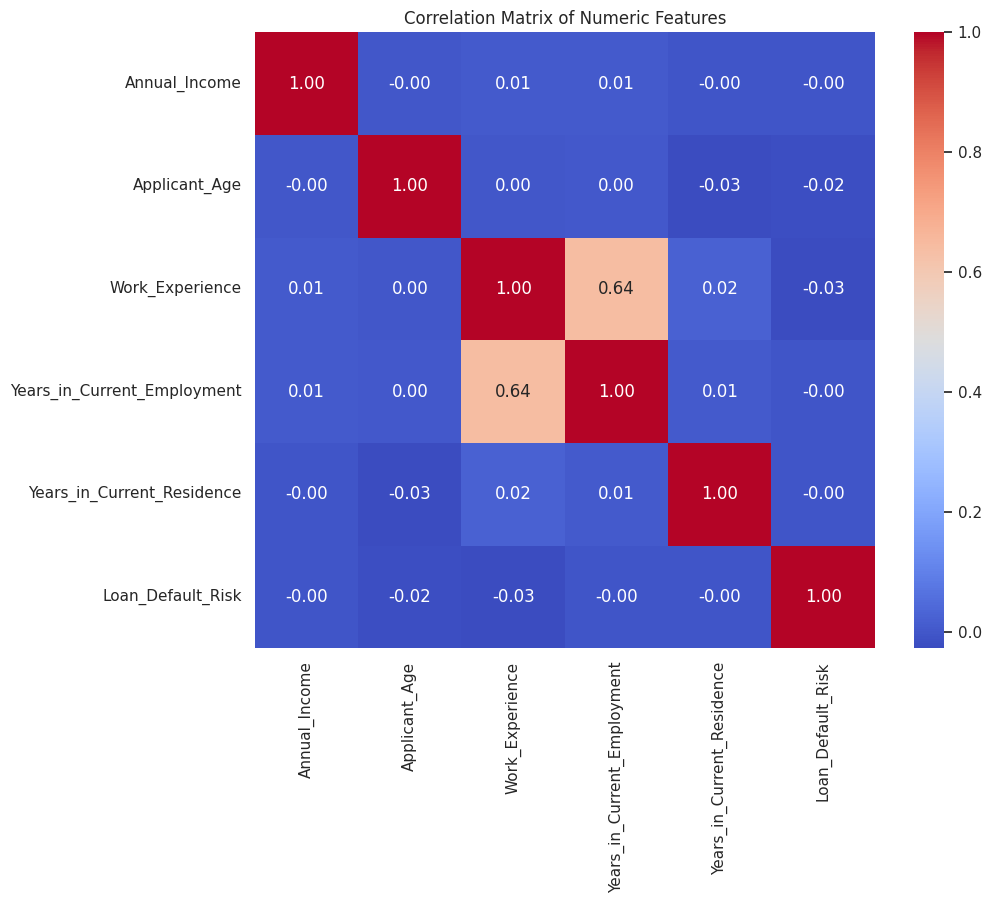

In [27]:
import seaborn as sns

# Extract subset of numeric features
numeric_features = ['Annual_Income', 'Applicant_Age', 'Work_Experience', 'Years_in_Current_Employment', 'Years_in_Current_Residence', 'Loan_Default_Risk']
numeric_df = df[numeric_features]

corr_data = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

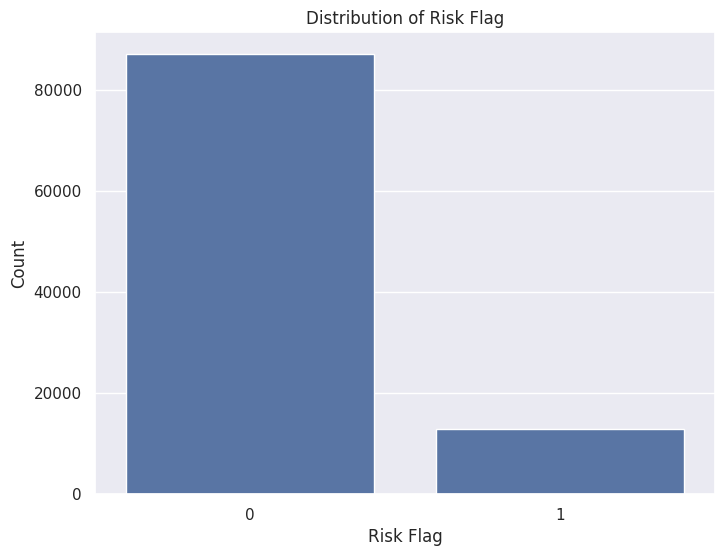

In [28]:
plt.figure(figsize=(8, 6))
target_ax = sns.countplot(data=df, x='Loan_Default_Risk')
plt.title('Distribution of Risk Flag')
plt.xlabel('Risk Flag')
plt.ylabel('Count')
plt.show()

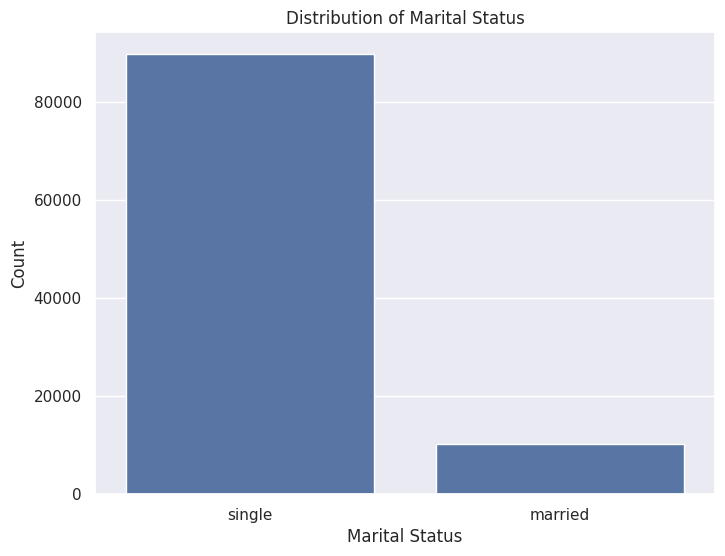

In [29]:
plt.figure(figsize=(8, 6))
maritial_ax = sns.countplot(data=df, x='Marital_Status')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [30]:
data = df.copy()

data = data.drop(['Residence_City', 'Residence_State', 'Applicant_ID'], axis=1)

In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_features = ['Marital_Status', 'House_Ownership', 'Vehicle_Ownership(car)', 'Occupation']

for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

data

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,9657655,76,0,1,2,0,40,0,12,0
1,9259353,37,18,1,2,0,36,12,11,0
2,1509721,66,8,1,2,0,19,4,12,0
3,5867312,43,1,1,1,0,7,1,13,1
4,7223191,44,9,1,2,0,0,9,13,0
...,...,...,...,...,...,...,...,...,...,...
99995,156398,69,10,1,2,1,49,7,14,0
99996,1900932,69,11,1,2,0,33,5,10,0
99997,6395936,66,11,1,1,0,12,11,14,0
99998,4505937,52,6,1,2,0,36,6,14,0


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)

data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

data_scaled_df

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
0,0.966,0.948,0.000,1.000,1.000,0.000,0.800,0.000,0.500,0.000
1,0.926,0.276,0.900,1.000,1.000,0.000,0.720,0.857,0.250,0.000
2,0.150,0.776,0.400,1.000,1.000,0.000,0.380,0.286,0.500,0.000
3,0.586,0.379,0.050,1.000,0.500,0.000,0.140,0.071,0.750,1.000
4,0.722,0.397,0.450,1.000,1.000,0.000,0.000,0.643,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...
99995,0.015,0.828,0.500,1.000,1.000,1.000,0.980,0.500,1.000,0.000
99996,0.189,0.828,0.550,1.000,1.000,0.000,0.660,0.357,0.000,0.000
99997,0.639,0.776,0.550,1.000,0.500,0.000,0.240,0.786,1.000,0.000
99998,0.450,0.534,0.300,1.000,1.000,0.000,0.720,0.429,1.000,0.000


In [33]:
data_scaled_df['Loan_Default_Risk'].value_counts()

,count
Loan_Default_Risk,
0.000,87003
1.000,12997


In [34]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into features (X) and target variable (y)
X = data.drop('Loan_Default_Risk', axis=1)
y = data['Loan_Default_Risk']

# Split the data into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=4)

# Apply SMOTE to the training data
smote = SMOTE(random_state=4)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_validation.shape)

X_train shape: (139340, 9)
X_validation shape: (20000, 9)
y_train shape: (139340,)
y_validation shape: (20000,)


In [35]:
X_train['Marital_Status'].value_counts()

,count
Marital_Status,
1,126106
0,13234


In [36]:
y_train.value_counts()

,count
Loan_Default_Risk,
0,69670
1,69670


# LogisticRegression

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
logistic_reg_model = LogisticRegression(random_state=4)
logistic_reg_model.fit(X_train, y_train)

# Predict the target variable using X_validation
y_pred = logistic_reg_model.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, zero_division=1)  # Set zero_division=1
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.86665
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


# GradientBoostingClassifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=4)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_validation)

accuracy_gb = accuracy_score(y_validation, y_pred_gb)
precision_gb = precision_score(y_validation, y_pred_gb)
recall_gb = recall_score(y_validation, y_pred_gb)
f1_gb = f1_score(y_validation, y_pred_gb)

print("\nGradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)


Gradient Boosting Classifier Metrics:
Accuracy: 0.6225
Precision: 0.2119853721835555
Recall: 0.6737907761529809
F1 Score: 0.32250538406317303


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model with 3 neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9252
Precision: 0.6948419301164726
Recall: 0.7829021372328459
F1 Score: 0.7362482369534555


# ExtraTreesClassifier

In [40]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees_model = ExtraTreesClassifier()

extra_trees_model.fit(X_train, y_train)

y_pred = extra_trees_model.predict(X_validation)

accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred)
recall = recall_score(y_validation, y_pred)
f1 = f1_score(y_validation, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.93275
Precision: 0.6667507568113017
Recall: 0.9910011248593926
F1 Score: 0.7971648318503997


# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=4)

random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_validation)

accuracy_rf = accuracy_score(y_validation, y_pred_rf)
precision_rf = precision_score(y_validation, y_pred_rf)
recall_rf = recall_score(y_validation, y_pred_rf)
f1_rf = f1_score(y_validation, y_pred_rf)

print("\nRandom Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)


Random Forest Classifier Metrics:
Accuracy: 0.93275
Precision: 0.6667507568113017
Recall: 0.9910011248593926
F1 Score: 0.7971648318503997


# classification_report

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_validation, y_pred)

cm = confusion_matrix(y_validation, y_pred)

cr = classification_report(y_validation, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Accuracy: 0.93275

Confusion Matrix:
[[16012  1321]
 [   24  2643]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     17333
           1       0.67      0.99      0.80      2667

    accuracy                           0.93     20000
   macro avg       0.83      0.96      0.88     20000
weighted avg       0.95      0.93      0.94     20000



# Sample Data Set

In [43]:
# Sample data for prediction
sample_data = [[5000, 35, 10, 1, 1, 1, 4, 2, 10]]

# Use the Extra Trees Classifier model to make predictions
prediction = extra_trees_model.predict(sample_data)

print("Prediction:", prediction)

Prediction: [0]
